# Printing

In [38]:
print("hi")    # print the word "hi"
println("bye") # print "bye" followed by a new line

hibye


# Types

In [ ]:
typeof(52.0)  # Returns the type of a variable/number, in this case Float64

Types can be created using the type keyword, created by a function call of the same name and fields accessed by .:

In [16]:
# Create a new type called MyNewType
type MyNewType
    field1::Float64
    field2::Int
end

# Instantiate a variable of type MyNewType
m=MyNewType(1.0,3)

m.field1   # access field1, which is 1.0
m.field2   # access field2, which is 3

m.field1=5.5  # set field1 to 5.5
m.field2=4    # set field2 to 4


n=copy(m)   # copies the data from m to a new MyNewType called n

MyNewType(1.0,3)

Abstract types are created with abstract:

In [39]:
abstract MyAbstractType

type MySubType <: MyAbstractType
    ff
end

`<:` is used to test if a type is a subtype of an abstract type:

In [40]:
MySubType <: MyAbstractType  # true
MySubType <: Number  # false
MySUbType <: Any  # true, as all types are <: Any

true

The super type can be found using `super`:

In [ ]:
super(Int32)  # returns Signed, which represents all signed integers.
super(Int64)  # returns Signed
super(Float32) # returns AbstractFloat

# Functions

New functions can be created using the `function` keyword.  The same function can be defined for different argument types:

In [ ]:
function mydot(a::Integer,b::Integer)
    a*b
end

function mydot(a::Vector,b::Vector)
    # we assume length(a)  == length(b)
    ret=0
    for k=1:length(a)
        ret=ret+a[k]*b[k]
    end
    ret
end


f(x) = x^2  # Shorthand notation for defining a function call f


f = x->x^2  # Anonyomous function

f = x->begin
    a=x^2
    a^2
end

Functions can be created that take in a variable number of arguments.  In this case, the input is a `Tuple`:

In [12]:
function varlengthg(x,y,z...)
    # z is a Tuple, while x and y are normal variables
    if length(z) == 0
        (x,y)
    else
        z
    end
end

varlengthg(1)  # need at least an x and a y

LoadError: LoadError: MethodError: `varlengthg` has no method matching varlengthg(::Int64)
Closest candidates are:
  varlengthg(::Any, !Matched::Any, !Matched::Any...)
while loading In[12], in expression starting on line 10

In [13]:
varlengthg(1,4.0)

(1,4.0)

In [14]:
varlengthg(1,4.0,6.0,7.0,8)

(6.0,7.0,8)

# Numbers

There are many different inbuilt types of numbers in Julia:

In [6]:
Int32          # A 32-bit integer
Int64          # A 64-bit integer
Int            # Equivalent to Int32 or Int64, depending on the machine
UInt32         # An unsigned 32-bit integer.  Default displayed in hexadecimal format
UInt64         # An unsigned 32-bit integer.  Default displayed in hexadecimal format
Float32        # A 32-bit float
Float64        # A 64-bit float
BigFloat       # A Type that represents larger precision floating point numbers

Here are some basic routines:

In [ ]:
bits(52)       # Returns the bits of a number as a String
typemax(Int64) # Returns the maximum number in a given type
typemin(Int64) # Returns the smallest number in a given type, typically a very large negative number

When possible, a number can be converted from one type to another:

In [18]:
UInt64(5)     # Returns a UInt64 that equals 5
Float64(5)    # Returns 5.0

5.0

When not possible it throws an error:

In [ ]:
Int64(5.5)   # Throws an InexactError since 5.5 can't be represented as an Int
UInt64(-5)   # Throws an InexactError

Instead, use `round`:

In [21]:
round(Int64,5.5)   # Return 6

6

In [53]:
mod(5,4)    # 5 mod 4, returns 1 
gcd(12,9)   # greatest commond divsor, in this case 3
lcm(12,9)   # least common multiple, in this case 36

36

In [66]:
x=5
inv(x)  # Equivalent to 1/x, in this case promotes to Float64
div(x,2)  # x/2 truncated to an  integer

2

In [63]:
x=UInt64(25)
x << 3  # Shift the bits of x left by three, equivalent to 2^3x
x >> 3  # Shift the bits of x left by three, equivalent to div(x,2^3)

0.04

# Floating point arithmetic

In [27]:
exponent(100.3)     # Returns the exponent in floating point representation
significand(100.3)  # Returns the significand
realmin(Float64)    # Returns the smallest normal number
realmax(Float64)    # Returns the largest normal number

-Inf

Special numbers

In [28]:
Inf                 # Represents positive Infinity
-Inf                # Represents positive Infinity
NaN                 # Represents not a number

-Inf

# Vectors

Vectors can be created in many ways:

In [ ]:
v=[11,24,32]          # Create a Vector whose entries are Int
v=[1.0,1,"1"]         # Creates a Vector whose entries are Any
v=Float64[11,24,32]   # Create a Vector whose entries are Float64
v=rand(5)             # Creates a random Float64 Vector of length 5
v=zero(5)             # Creates a zero Float64 Vector
v=zero(Int64,5)       # Creates a zero Int64 Vector
v=ones(5)             # Creates a Float64 Vector of all ones
v=ones(Int64,5)       # Creates a Int64 Vector of all ones
v=Float64[k^2 for k=1:5]  # Creates the vector [1.0,4.0,9.0,16.0,25.0]


v[2]=5  # Change second entry to 5

eltype(v)   # Returns the type of the entries of a Vector
length(v)   # Returns the number of entries of v

Arithmetic can be done on vectors:

In [ ]:
v=rand(5);w=rand(5)

v+w       # add two vectors
v-w       # subtract two vectors
v.*w      # entrywise multiplication
dot(v,w)  # dot product

In [45]:
v=rand(5)
norm(v)   # 2-norm of v
norm(v,1) # 1-norm of v
norm(v,Inf)  # ∞-norm of v
maximum(v)   # maximum entry
minimum(v)   # minimum entry
maximum(abs(v))  # equivalent to ∞-norm

0.1382003693809959

# Tuples

In [58]:
(1,2.0,"hi") # A Tuple{Int,Float64,ASCIIString}


(x,y)=(1,2.0)  # set x to 1 and y to 2.0 simeultaneously
(x,y)=(y,x)    # swap x and y

(2.0,1)

# Ranges

Ranges are AbstractVector's defined using an initial point and endpoint, with an optional step in the middle:

In [43]:
2:6     # Returns Range that represents to [2,3,4,5,6]
2:3:6   # Returns Range that represents to [2,5]
5:-1:2  # Returns Range that represents to [5,4,3,2]

linspace(-1.,1.,5) # Represents a Range that divides -1. to 1., inclusive, into 5 evenly spaced points

linspace(-1.0,1.0,5)

In [44]:
collect(2:3:6)  # Collect converts an AbstractVector to a Vector, in this case [2,5]
collect(linspace(-1.,1.,5) )

5-element Array{Float64,1}:
 -1.0
 -0.5
  0.0
  0.5
  1.0

# For loops and while loops

A for loop evaluates for every `k` in a given `AbstractVector`:

In [2]:
for k=10:-2:1
    println(k)
end

10
8
6
4
2


 while loop evaluates until a condition is false:

In [3]:
k=0
while k ≤ 5
    println(k)
    if rand() > 0.5
        k+=1
    end
end

0
1
1
2
2
2
3
4
4
5


# Map

Map applies a function to each element in an AbstractArray:

In [3]:
f=x->x^2

map(f,[1.,2.,3.])

3-element Array{Float64,1}:
 1.0
 4.0
 9.0

When used for `Matrix`, it preserves the shape:

In [4]:
map(f,[1. 2.; 3. 4.])

2x2 Array{Float64,2}:
 1.0   4.0
 9.0  16.0

# Splat

Splat takes a vector/tuple and "splats" it out to become arguments of a function:

In [5]:
f=(x,y,z,w,t)->x+y+z
v=[1.,2.,3.,4.,5.]
f(v...)

6.0

# Error messages

Julia will throw (almost incomprehensible) error messages when things go wrong.  Here are some common examples:

_BoundsError_: An array was accessed outside its length/size

In [4]:
r=[1,2]
r[3]     # an error is thrown since r only has two elements

LoadError: LoadError: BoundsError: attempt to access 2-element Array{Int64,1}:
 1
 2
  at index [3]
while loading In[4], in expression starting on line 2

_DomainError_: A function was called on inputs where the return value is not defined, usually to ensure type inference

In [9]:
sqrt(-1)   # sqrt is not defined for negative real numbers, but is defined for all complex numbers: sqrt(-1+0im)

LoadError: LoadError: DomainError:
sqrt will only return a complex result if called with a complex argument. Try sqrt(complex(x)).
while loading In[9], in expression starting on line 1

_InexactError_: The type being set doesn't match the type required

In [8]:
r=[1,2]
r[1]=2.5  # r initially only has ints, so is created as a Vector{Int}.  Therefore an entry cannot be set to a Float

LoadError: LoadError: InexactError()
while loading In[8], in expression starting on line 2

_StackOverflowError_: There were too many function calls buried, usually due to an infinite cycle

In [13]:
f(x)=f(x)^2    
f(1) # This calls f an infinite number of times.  At some point the "Stack" runs out of memory and Julia gives up.

LoadError: LoadError: StackOverflowError:
while loading In[13], in expression starting on line 2

_LoadError: MethodError:_ This means a function is not defined.  A common source of this error is using a function name as a variable name:

In [2]:
norm=5.0
norm([1,2,3])

LoadError: LoadError: MethodError: `call` has no method matching call(::Float64, ::Array{Int64,1})
Closest candidates are:
  BoundsError()
  BoundsError(!Matched::Any...)
  DivideError()
  ...
while loading In[2], in expression starting on line 2

`LoadError: UndefVarError:`  This means a variable was never defined.  A common source of error is when a variable is defined in a different "scope".  In the example below, x is created locally inside the for loop, so doesn't exists afterward:

In [16]:
for k=1:10
    x=5
end
x

LoadError: LoadError: UndefVarError: x not defined
while loading In[16], in expression starting on line 4

To avoid this error, create the variable first and then it uses the outer scope `x`:

In [17]:
x=0
for k=1:10
    x=5
end
x

5

# Warnings

There are many warnings that can be displayed.  The most common case is _deprecation_, where a feature that currently works will be disabled in the future.  Here are some examples:

In [1]:
r=[1,2]
r[2/2]=5    # 2/2 returns a Float, and in the future arrays will only be accessible with ints.  Use div instead of /

 in depwarn at deprecated.jl:73
 in to_index at deprecated.jl:447
 in setindex! at array.jl:313
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /Users/solver/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /Users/solver/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[1], in expression starting on line 2


5

In [2]:
a=[1,2,3]
b=[4,5,6]
[a,b]      # Right now ',' concatenates vectors.  In the future, this will return a Vector{Vector{Int}}.
           # Use ';' instead of ',' to concatenate

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Users/solver/Projects/julia/usr/lib/julia/sys.dylib
 in vect at abstractarray.jl:32
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /Users/solver/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /Users/solver/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[2], in expression starting on line 3


6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

# Matrices

In [36]:
zeros(5,5)         # Creates a 5x5 matrix of Float64 zeros
zeros(Int64,5,5)   # Creates a 5x5 matrix of Int64 zeros
eye(5)             # Creates a 5x5 identity matrix of type Float64
eye(Int64,5)       # Creates a 5x5 identity matrix of type Int64
Int64[k^2+j for k=1:6,j=1:5]  # Creates a 6x5 matrix of type Int64 with the specified entries

6x5 Array{Int64,2}:
  2   3   4   5   6
  5   6   7   8   9
 10  11  12  13  14
 17  18  19  20  21
 26  27  28  29  30
 37  38  39  40  41

In [ ]:
M=[1 2; 3 4; 5 6]  # Creates a 3 x 2 matrix
vec(M)             # Converts M to a Vector of size 3*2=6
size(M)            # Returns the tuple (3,2) containing the size of M
size(M,1)          # Returns the number of rows: 3
size(M,2)          # Returns the number of columns: 2

In [ ]:
M=rand(3,3)
N=rand(3,4)
L=rand(3,3)
det(M)  # Calculate the determinant of M
M*N     # The matrix multiplication of M and N
M.*N    # Entrywise multiplication of M and N

b=ones(3)
u=M\b   # solve M*u=b
u=N\b   # minimizes norm(N*u-b,2)

M'     # Conugate transpose of M, which is transpose on real matrice
M.'    #  Transpose of M

In [46]:
M=rand(5,5)
triu(M)  # Upper triangular half of M
tril(M)  # Lower triangular half of M

5x5 Array{Float64,2}:
 0.472744   0.0         0.0        0.0       0.0     
 0.0826164  0.761681    0.0        0.0       0.0     
 0.193172   0.049155    0.184043   0.0       0.0     
 0.374569   0.406991    0.0359636  0.14504   0.0     
 0.0256743  0.00554313  0.520697   0.591943  0.448798

In [ ]:
A[a:b,k]    # returns the a-th through b-th rows of the k-th column of A as a Vector of length (b-a+1)
A[k,a:b]    # returns the ath through bth columns of the k-th row of A as a 1 x (b-a+1) Matrix
A[:,k]      # returns all rows of the k-th column of A as a Vector of length size(A,1)
A[k,:]      # returns all columns of the k-th row of A as a 1 x size(A,2) Matrix
A[a:b,c:d]  # returns the a-th through b-th rows and c-th through d-th columns of A 
            # as a (b-a+1) x (d-c+1) Matrix
A[[1,3,4],2]  # returns the 1st, 3rd and 4th rows of the 2nd column of A


In [ ]:
A=rand(5,5)
norm(A)       # The induced 2-norm
norm(A,Inf)   # The induced ∞-norm
norm(A,1)     # The induced 1-norm
cond(A)       # The condition number, i.e., norm(A)*norm(inv(A))

# Matrix Factorizations

In [ ]:
n=5
A=rand(n,n)
L,U,σ=lu(A)   # LUP Factorization where σ is a Vector{Int}

Q,R=qr(A)     # QR Factorizaiton



A=rand(5,10)
Z=nullspace(A) # Gives an orthogonal matrix whose columns are the nullspace of A: A*Z is zero

# Strings

Strings can be created using double quotes:

In [7]:
str="hello world 😀"

"hello world 😀"

We can access characters of a string with brackets:

In [ ]:
str[13]  # thirteenth-characher, which is of type Char

There are a number of helper functions:

In [10]:
length(str)            # The number of characters

13

# Parse and reinterpret

`parse` converts a number given in String format:

In [11]:
parse(Int,"123")        # Parses 123 as an Int
parse(Int,"-10101",2)   # Parses -21 given in base 2 (-10101)_2 as an Int
parse(Float64,"123.45") # Parses 123.45 as a Float64 

123.45

We can also reinterpret numbers as another type of the same length:

In [14]:
bts="00000000000000011111011001001010"
x=parse(UInt32,bts,2)  # parses 128586 as an UInt32
reinterpret(Char,x)    # reinterprets the bits as a 1285

'🙊'

# Plotting in PyPlot

We use PyPlot to do plotting, here are some simple examples:

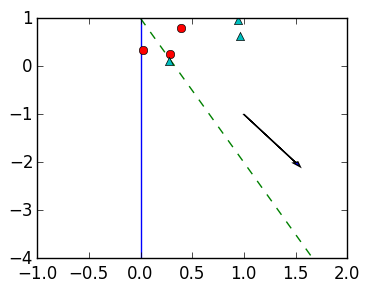

In [19]:
using PyPlot 

plot([0.,0.],[1.,-4.])                         # draw line from [0.,1.] to [0.,-4.]
plot([0.,2.],[1.,-5.];linestyle="--")          # draw  dashed line from [0.,1.] to [2.,-5.]
plot(rand(3),rand(3);marker="o",linestyle="")  # draw 3 random points as circles
plot(rand(3),rand(3);marker="^",linestyle="")  # draw 3 random points as triangles

arrow(1.,-1.,0.5,-1.; head_width=0.05,head_length=0.1)  # draws an arrow from (1,-1) to (1+0.5,-1-1.)

axis([-1,2,-4,1])                              # Change the axis to (-1,-5) to (2,1);

We can plot functions by evaluating at many x values to get the y values, and doing a line plot:

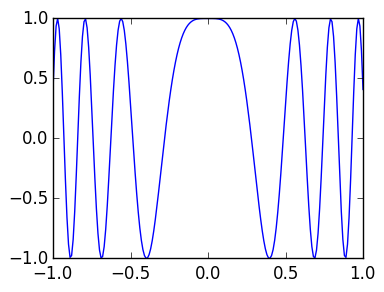

In [20]:
x=-1.:0.01:1.
plot(x,cos(20x.^2))   # Remember: we need .^, ./, etc. when we want to apply entrywise to a vector/matrix;

A `semilogy` plot scales the y-axis logarithmically.  It shows exponential behaviour as straight lines, with the slow given by the exponent:

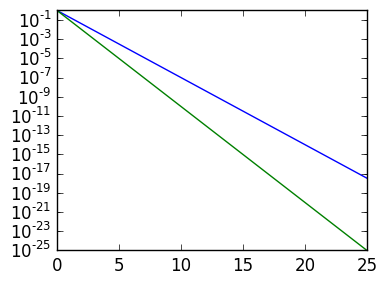

In [26]:
k=(0.:25.)
semilogy(k,exp(-2k))  # Log scale the y axis;
semilogy(k,10.(-k))  # Log scale the y axis;

A `loglog` plot scales both x and y-axis logarithmically.  It shows algebraic behaviour as straight lines, with the slope 

## 3D Plots 

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


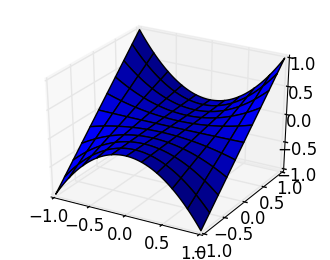

In [12]:
f(x,y)=y*x^2   

x=y=linspace(-1.,1.,100)

z=Float64[
    f(x[j],y[k]) 
    for k=1:length(y), j=1:length(x)]


using PyPlot

surf(x,y,z)  # 3D plot of f;